In [1]:
import qiskit as q
from qiskit import *
from matplotlib import pyplot as plt
%matplotlib inline

token = q.IBMQ.stored_account()['token']
IBMQ.enable_account(token)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
#IBMQ.providers()
provider = IBMQ.get_provider(hub='ibm-q')
backends = provider.backends()
backend = providers.ibmq.least_busy(backends)

In [13]:
qr = q.QuantumRegister(2)
cr = q.ClassicalRegister(2)

In [14]:
circuit = q.QuantumCircuit(qr,cr)
circuit.draw()

q12_0: 
       
q12_1: 
       
 c1: 2/

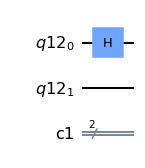

In [15]:
circuit.h(qr[0]) #hadomar to the first qubit
circuit.draw(output='mpl')

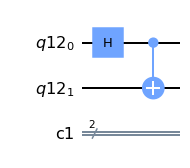

In [16]:
#two qubit controlled x, like an if statement
circuit.cx(qr[0], qr[1])
circuit.draw(output='mpl')

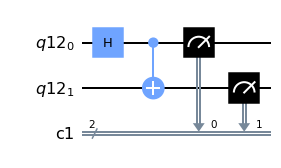

In [17]:
#Now add measurement of the qubits and store in the classical register
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [18]:
#Simulating that circuit, get results, and plot
sim = q.Aer.get_backend('qasm_simulator')
result = q.execute(circuit, backend = sim).result()

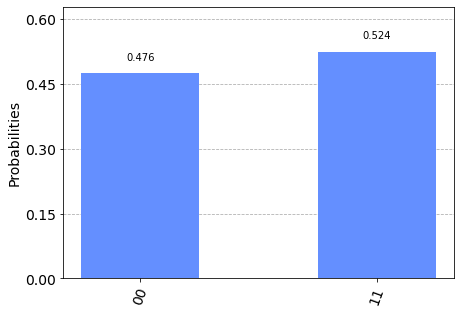

In [19]:
#Visualtization
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [20]:
#Got my IBMQ token
#from qiskit import IBMQ
#IBMQ.save_account('df1ff29aeb05d9504cb7f76790492bf3830729da0c97ffe24938a7ab4a6c0ec71bab4224ae8d709aefa8be4e2e7cb7f6348a1f8acfcad5726267d30c5bf72056', overwrite=True)

In [21]:
#IBMQ.load_account()

In [22]:
#provider = IBMQ.get_provider('ibm-q')

job = q.execute(circuit, backend=backend)

In [23]:
#from qiskit.tools.monitor import job_monitor
#Monitors the job on the REAL QUANTUM COMPUTER!
#When Job finishes, get the result and then plot the histogram
tools.job_monitor(job)
result = job.result()

Job Status: job has successfully run


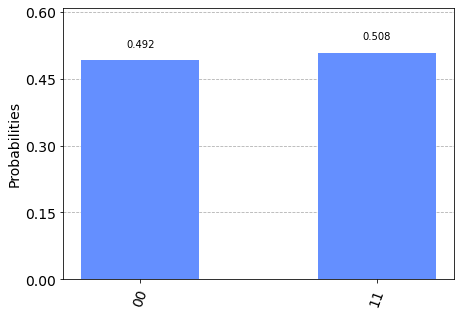

In [24]:
plot_histogram(result.get_counts(circuit))


### Gates!

In [14]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
#Make the circuit, one qbit 1 classical bit and just one x gate
x_circuit = QuantumCircuit(1,1)
x_circuit.x(0)
#Simulate the circuit as a statevector
simulator = Aer.get_backend('statevector_simulator')
result = execute(x_circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector) #Gave it 0, printed the result as 1!

[0.+0.j 1.+0.j]


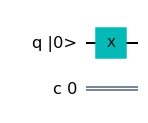

In [15]:
x_circuit.draw(output='mpl', initial_state = True) 

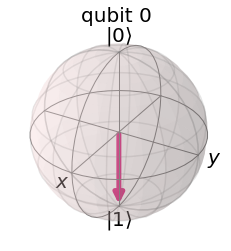

In [16]:
#Now can use the bloch_sphere/bloch_multivector
plot_bloch_multivector(statevector)

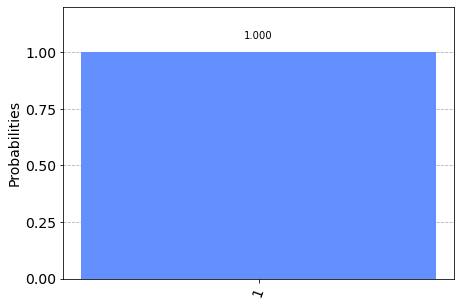

In [17]:
x_circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
result = execute(x_circuit, backend=backend, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts) #100% chance that the output is 1

In [18]:
#Now try in the unitary method
#Simulate the circuit as a unitary
x_circuit = QuantumCircuit(1,1)
x_circuit.x(0)

simulator = Aer.get_backend('unitary_simulator')
result = execute(x_circuit, backend = simulator).result()
unitary = result.get_unitary()
print(unitary) #Unitary representation of x

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [19]:
"""So 1) Described the statevector representation, as a dirac type operator.
      2) Described the output of X[0] using the bloch sphere (spin up/down)
      3) Described the results of repeated measurements of X[0] in 
         unitary notation"""

'So 1) Described the statevector representation, as a dirac type operator.\n      2) Described the output of X[0] using the bloch sphere (spin up/down)\n      3) Described the results of repeated measurements of X[0] in \n         unitary notation'

### Quantum Teleportation

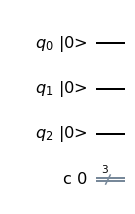

In [20]:
from qiskit import *
tele = QuantumCircuit(3,3)
tele.draw(output='mpl', initial_state = True) 
#cregbundle = False unbundles the creg

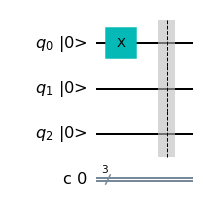

In [21]:
# Teleport information from q0 to q2, using q1. Teleporting the dirac state 1
tele.x(0)
tele.barrier()
tele.draw(output='mpl', initial_state = True)
#Barrier is just a literal barrier for the transpiler

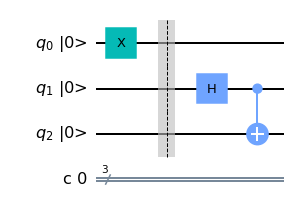

In [22]:
#Create entanglement between q1 and q2
tele.h(1)
tele.cx(1,2)
tele.draw(output='mpl', initial_state = True)

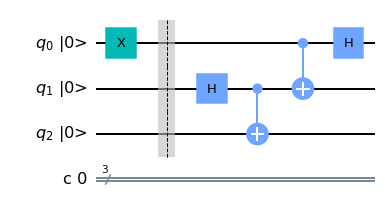

In [23]:
tele.cx(0,1)
tele.h(0)
tele.draw(output='mpl', initial_state = True)

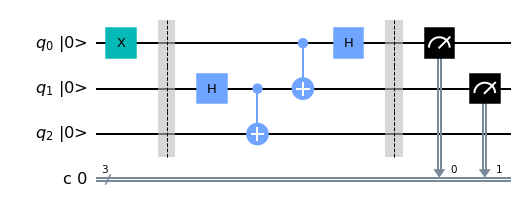

In [24]:
tele.barrier()
tele.measure([0,1], [0,1])
tele.draw(output='mpl', initial_state = True)

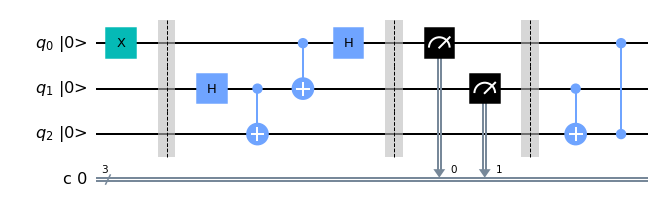

In [25]:
tele.barrier()
tele.cx(1,2)
tele.cz(0,2)
tele.draw(output='mpl', initial_state = True)

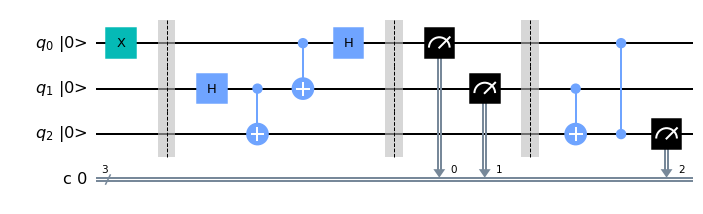

In [26]:
tele.measure(2,2)
tele.draw(output='mpl', initial_state = True)

In [37]:
#Now Simulate!
#Hold on. Expectations: q2/c2 should be a 1 because that 
    #is where the 1 was teleported
#q0 and q1?
simulator = Aer.get_backend('qasm_simulator')
result = execute(tele, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

NameError: name 'tele' is not defined

In [28]:
print(counts)

{'100': 219, '110': 286, '101': 256, '111': 263}


### Teleporting the Hadomard state (?)

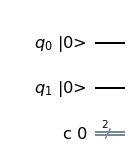

In [29]:
teleh = QuantumCircuit(2,2)
teleh.draw(output='mpl', initial_state = True)

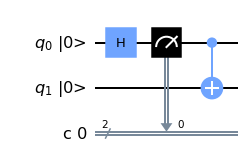

In [30]:
teleh.h(0)
teleh.measure([0], [0])
teleh.cx(0,1)
teleh.draw(output='mpl', initial_state = True)

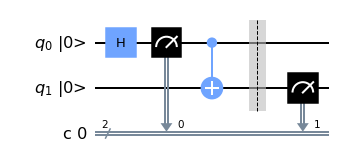

In [31]:
#Same circuit after that (?)
teleh.barrier()
teleh.measure([1], [1])
teleh.draw(output='mpl', initial_state = True)

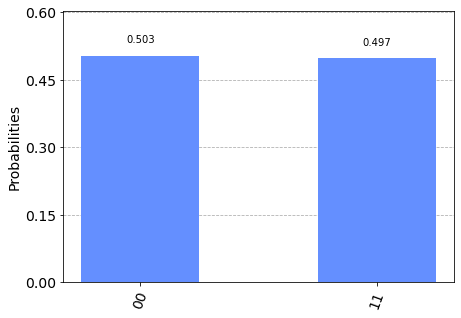

In [32]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(teleh, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

### Bernstein-Vazirani

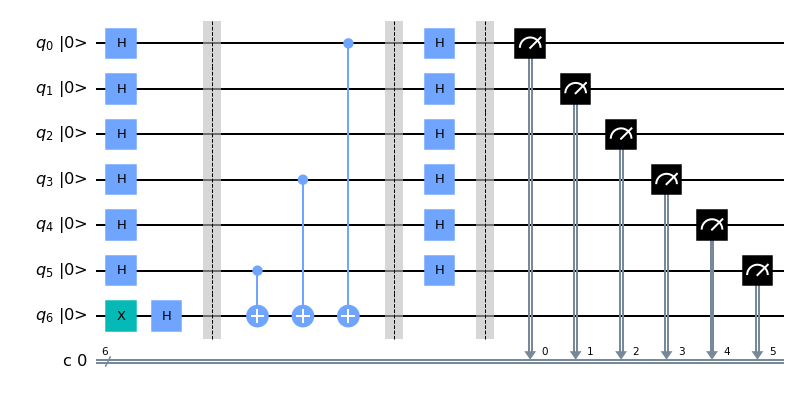

In [33]:
#Guessing secret numbers in 1 try! 6bit numbers
#Classical computers apply 6 AND operations to figure out which digits are 0/1
#We are even smarter!
secretnumber = '101001'
numcircuit = QuantumCircuit(6+1, 6)

numcircuit.h([0,1,2,3,4,5])
numcircuit.x(6)
numcircuit.h(6)

numcircuit.barrier()

#Apply a cx for each 1,
numcircuit.cx(5,6)
numcircuit.cx(3,6)
numcircuit.cx(0,6)
numcircuit.barrier() #this section represents the secret number in binary

numcircuit.h([0,1,2,3,4,5])
numcircuit.barrier()

numcircuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
numcircuit.draw(output='mpl', initial_state = True)

#This only works for this number

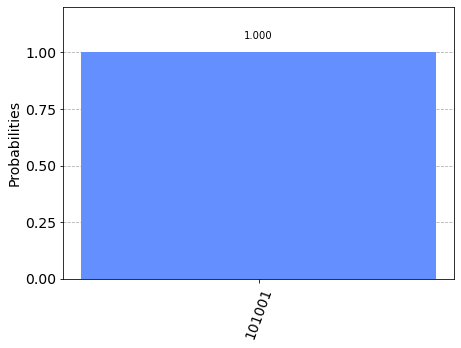

In [34]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(numcircuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
plot_histogram(counts)

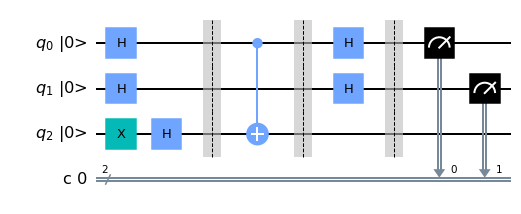

In [35]:
#Now generalize this
secretnumber = '01'
numcircuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

numcircuit.h(range(len(secretnumber)))
numcircuit.x(len(secretnumber))
numcircuit.h(len(secretnumber))

numcircuit.barrier()

#Apply a cx for each 1
for idx, ele in enumerate(reversed(secretnumber)):
    if ele == '1':
        numcircuit.cx(idx,len(secretnumber))

numcircuit.barrier() #this section represents the secret number in binary

numcircuit.h(range(len(secretnumber)))
numcircuit.barrier()

numcircuit.measure(range(len(secretnumber)), range(len(secretnumber)))

numcircuit.draw(output='mpl', initial_state = True)

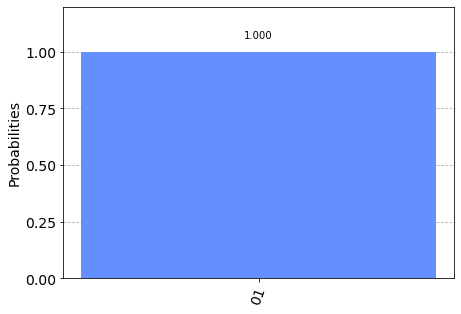

In [38]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(numcircuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
plot_histogram(counts)
#print(counts)